## Table of contents:

Project Introduction

Data

Data Preparation

Methodology/Analysis

Modeling

Results

Discussion

Conclusion

### Project Introduction

#### The problem is that there are too many car accidents. I would like to find out using data science what the main causes of the problem are, how likely is it for someone to get in a car accident and how severe it can be.The analysis aims to help people that need to travel by car because they could estimate the probability of an accident based on factors such as weather condition, time of day, day of the week, season etc. Knowing the probability would help them decide if the travel is worth it or they can use other types of transit/choose not to travel.The government agency responsible for the roads would also benefit because the analysis might help in preventing accidents by uncovering places where it is most likely that an accident will happen. With this knowledge it would be easier to implement safety measures to reduce/prevent accidents from happening or even just reduce their severity in the future.

#### Data

#### I will be using the dataset provided in .csv format by the course’s teachers. The data will be read into a dataset using python 3 on Jupyter notebook. Initial analysis will make clear which attributes of the dataset will be most useful in predicting accident severity. My initial guess is that the type/location of accidents, car speed, weather, time of day,day of the week attributes will be the most useful but I will verify the correlation of each attribute by using regression functions.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline
print("packages loaded...")

packages loaded...


In [3]:
# Let's import the data

!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
df = pd.read_csv("Data-Collisions.csv")
df.head()

--2020-09-04 20:17:21--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  48.6MB/s   in 1.4s   

2020-09-04 20:17:23 (48.6 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
# Let's do some data exploration

df.describe(include='all')

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1780512,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [6]:
 # to see the type of each attribute
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [7]:
df.shape # dimesnison of the data

(194673, 38)

In [8]:
# SEVERITYCODE is what we have to predict
df["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [9]:
#let's see how many NaN values there are in each column in the dataset
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## Data Preparation


In [10]:
# Let's celan the dataset. Eliminate missing values and convert attributes to 0 and 1

#EXCEPTRSNDESC has unimportant data so we drop this column
#EXCEPTRSNCODE has unimportant data so we drop this column
#SDOTCOLUMN is not useful so we will drop it 

#PEDROWNOTGRNT only has a value of Y so let's assume the other values to be N
df["PEDROWNOTGRNT"].fillna("N", inplace=True) 

#SPEEDING only has a value of Y so let's assume the other values to be N
df["SPEEDING"].fillna("N", inplace=True)

#INATTENTIONIND only has a value of Y so let's assume the other values to be N
df["INATTENTIONIND"].fillna("N", inplace=True)


#LOCATION - can't substitute missing data, let's fill 0 for the unknown values
df["LOCATION"].fillna(0, inplace=True)

#ADDRTYPE, filling 0 for the unknown values
df["UNDERINFL"].fillna("0", inplace=True)

#ST_COLCODE, filling 0 for the unknown values
df["ST_COLCODE"].fillna(0, inplace=True)

df["PEDROWNOTGRNT"].astype("str")
df["HITPARKEDCAR"].astype("str")
df["UNDERINFL"].astype("str")
df["SPEEDING"].astype("str")

df["PEDROWNOTGRNT"].replace("N","0", inplace=True)
df["PEDROWNOTGRNT"].replace("Y","1", inplace=True)
df["HITPARKEDCAR"].replace("N","0", inplace=True)
df["HITPARKEDCAR"].replace("Y","1", inplace=True)
df["UNDERINFL"].replace("N","0", inplace=True)
df["UNDERINFL"].replace("Y","1", inplace=True)
df["SPEEDING"].replace("N","0", inplace=True)
df["SPEEDING"].replace("Y","1", inplace=True)

df["UNDERINFL"] = df["UNDERINFL"].astype("int64")
df["SPEEDING"] = df["SPEEDING"].astype("int64")
df["HITPARKEDCAR"] = df["HITPARKEDCAR"].astype("int64")
df["PEDROWNOTGRNT"] = df["PEDROWNOTGRNT"].astype("int64")

In [11]:
df["DAY"] = pd.to_datetime(df["INCDATE"]).dt.dayofweek
df["WEEKEND"] = df["DAY"] > 5 
df["WEEKEND"].rename({"False":"Weekday", "True":"Weekend"}, inplace=True)

df["DAY"] = pd.to_datetime(df["INCDATE"]).dt.dayofweek
df["WEEKEND"] = df["DAY"] > 5 
df["WEEKEND"].rename({"False":"Weekday", "True":"Weekend"}, inplace=True)

In [12]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION               0
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND         0
UNDERINFL              0
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT          0
SDOTCOLNUM         79737
SPEEDING               0
ST_COLCODE             0
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
DAY                    0
WEEKEND                0


## Methodology/Analysis

Text(0.5, 0, 'Type of address')

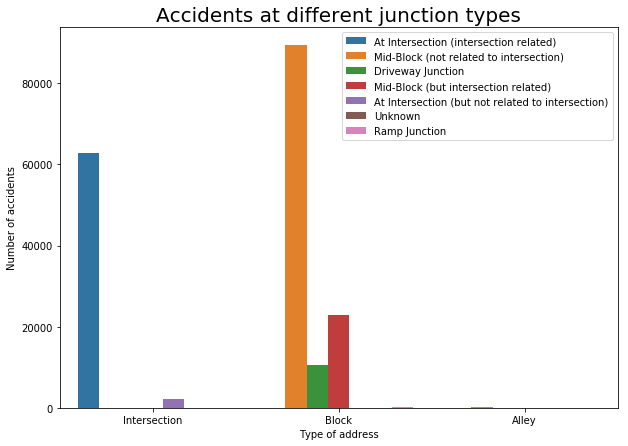

In [13]:
# Location factors
plt.figure(figsize=(10,7))
sns.countplot(x="ADDRTYPE", hue="JUNCTIONTYPE", data=df )
plt.title("Accidents at different junction types", fontsize=20)
plt.legend(loc="upper right")
plt.ylabel("Number of accidents")
plt.xlabel("Type of address")

### Some of the observations are:

1.Most accidents happen mid-block
2.The second most number of accidents happen at intersections
3.Virtually no accidents happen in alleys   

(array([0, 1]), <a list of 2 Text xticklabel objects>)

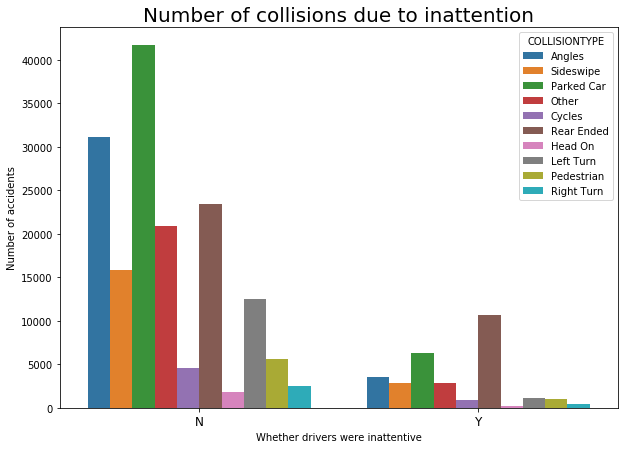

In [14]:
# Inattention factor
plt.figure(figsize=(10,7))
sns.countplot(x="INATTENTIONIND", hue="COLLISIONTYPE", data=df)
plt.title("Number of collisions due to inattention", fontsize=20)
plt.xlabel("Whether drivers were inattentive")
plt.ylabel("Number of accidents")
df["JUNCTIONTYPE"].unique()

plt.xticks(fontsize=12)

## Observations:

1.When not attentive, drivers mostly drive into rear end of other cars
2.When attentive, drivers mostly drive into parked cars
3.Virtually no pedestrians are hit when drivers are inattentive

In [17]:
# time of day factor
# first we split the date to dayofweek, month, hour
df_time = df[["INCDTTM","SEVERITYCODE"]].copy(deep=True)
df_time["INCDTTM"] = pd.to_datetime(df_time["INCDTTM"])
df_time["INCDTTM"]
df_time["DAYOFWEEK"] = df_time["INCDTTM"].dt.dayofweek
df_time["MONTH"] = df_time["INCDTTM"].dt.month
df_time["HOUR"] = df_time["INCDTTM"].dt.hour
df_time.head()

,INCDTTM,SEVERITYCODE,DAYOFWEEK,MONTH,HOUR
0,2013-03-27 14:54:00,2,2,3,14
1,2006-12-20 18:55:00,1,2,12,18
2,2004-11-18 10:20:00,1,3,11,10
3,2013-03-29 09:26:00,1,4,3,9
4,2004-01-28 08:04:00,2,2,1,8


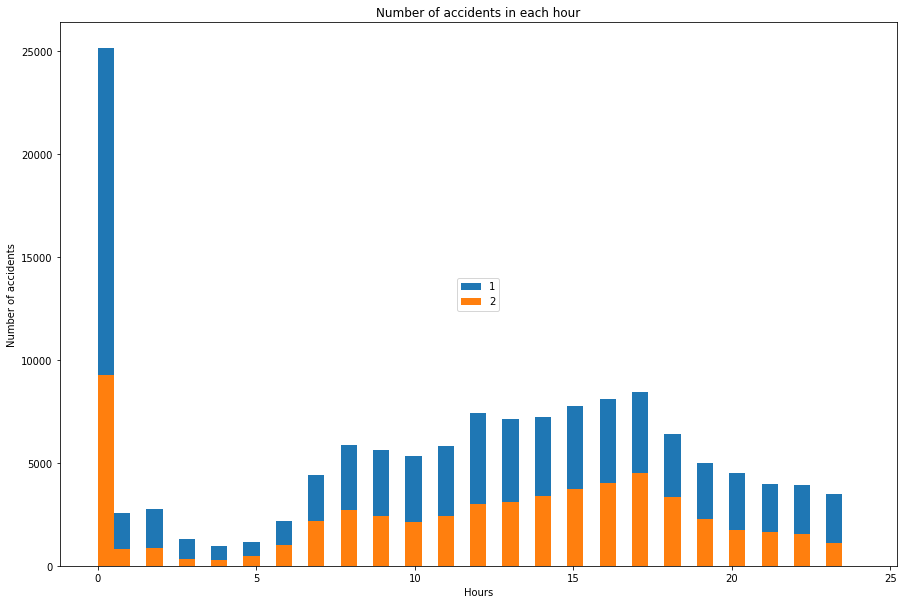

In [18]:
# now we plot the hour against the severety code
df_time.groupby("SEVERITYCODE")["HOUR"].plot(kind="hist",bins=np.linspace(0,24,48), figsize=(15,10),
                                            legend=True)
plt.xlabel("Hours")
plt.ylabel("Number of accidents")
plt.title("Number of accidents in each hour")
plt.legend(loc= "center")
plt.show()

### Observations:

Accidents are most likely to occur at 00:00 hour.
The time slots where it is the least likely that an accident happens is 01:00-06:00 and 20:00-23:00.

## Modeling

In [34]:
# Let's create the feature set
#drop unnecessary columns
features = df.drop(["OBJECTID","SEVERITYDESC","INCDATE" , "INCDTTM","INCKEY", "COLDETKEY", "REPORTNO", "LOCATION","STATUS", "SDOTCOLNUM", "SEGLANEKEY", "CROSSWALKKEY", "SDOT_COLDESC","ST_COLDESC", "INTKEY",  "EXCEPTRSNCODE", "EXCEPTRSNDESC", "HITPARKEDCAR","X","Y","SEVERITYCODE.1"],axis=1)
features = df

# Let's convert categorical varables to binary variables
#WEATHER
features[pd.get_dummies(features["WEATHER"]).columns] = pd.get_dummies(features["WEATHER"])
features.drop(["WEATHER"], axis=1, inplace=True)

#COLLISIONTYPE
features[pd.get_dummies(features["COLLISIONTYPE"]).columns] = pd.get_dummies(features["COLLISIONTYPE"])
features.drop(["COLLISIONTYPE"], axis=1, inplace=True)

#JUNCTIONTYPE
features[pd.get_dummies(features["JUNCTIONTYPE"]).columns] = pd.get_dummies(features["JUNCTIONTYPE"])
features.drop(["JUNCTIONTYPE"], axis=1, inplace=True)

#ADDRTYPE to Alley, block and intersection
features[["Alley", "Block", "Intersection"]] = pd.get_dummies(features["ADDRTYPE"])
features.drop(["ADDRTYPE"], axis=1, inplace=True)

#ROADCOND
features[pd.get_dummies(features["ROADCOND"]).columns] = pd.get_dummies(features["ROADCOND"])
features.drop(["ROADCOND"], axis=1, inplace=True)

#LIGHTCOND
features[pd.get_dummies(features["LIGHTCOND"]).columns] = pd.get_dummies(features["LIGHTCOND"])
features.drop(["LIGHTCOND"], axis=1, inplace=True)

features["INATTENTIONIND"] = features["INATTENTIONIND"].map({"Y": "1", "N": "0"})
features["SEVERITYCODE"] = features["SEVERITYCODE"].map({2: 1, 1: 0})
features["INATTENTIONIND"] = features["INATTENTIONIND"] .astype("int64")

features["WEEKEND"]  = features["WEEKEND"].astype("int64")

KeyError: 'COLLISIONTYPE'

In [23]:
#Let's see the correlation between the attributes
features.corr().style.background_gradient(cmap="Greens").format("{:.3f}")

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


###### Selecting the variables for modelling which have high correlation with the severity of accident:

In [25]:
features = features[["SEVERITYCODE","PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","SDOT_COLCODE","PEDROWNOTGRNT","Intersection", "Cycles", "Pedestrian", "At Intersection (intersection related)"]]
X = features.drop(["SEVERITYCODE"],axis=1)
y = features["SEVERITYCODE"]
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size=0.3)
from sklearn.metrics import accuracy_score

### Decision tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "entropy")
dt.fit(X_train, y_train)
yhat_dt = dt.predict(X_test)

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
yhat_lr=lr.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Results

In [29]:
from sklearn.metrics import f1_score

In [30]:
f1lr = f1_score(y_test, yhat_lr)
acclr = accuracy_score(y_test, yhat_lr)
accdt = accuracy_score(y_test, yhat_dt)

In [33]:
print("The accuracy score of the Decision Tree model is: ",accdt)
print("The accuracy score of the Logistic Regression model is: ",acclr)


The accuracy score of the Decision Tree model is:  0.7555220711619465
The accuracy score of the Logistic Regression model is:  0.7527481935550152


### Discussion



#### Summary of the observations discovered during data exploration:

1.Most accidents happen mid-block

2.The second most number of accidents happen at intersections

3.Virtually no accidents happen in alleys

4.When not attentive, drivers mostly drive into rear end of other cars

5.When attentive, drivers mostly drive into parked cars

6.Almost no pedestrians are hit when drivers are inattentive

7.Accidents are most likely to occur at 00:00 hour.

8.The time slots where it is the least likely that an accident happens is 01:00-06:00 and 20:00-23:00.

### Conclusion

##### The aim of this project was to build a model that can predict the severety of an accident with the help of the given attributes. An accuracy of 75% was achived which means that this model could be used for its intended purpose. However, there is always room to improve and with more data and work it could be made more precise. This model can be helpful for different stake holders such as the relevant authorities and drivers that want to evaluate their choices before sitting in the car.